In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from src.tickers import TICKERS
from src.data import get_ticker, get_monthly_market_data
from datetime import datetime

idx = pd.IndexSlice

In [3]:
# s = get_ticker('TCEHY')
# s

In [4]:
# mmd_df = (
#   yf
#     .download(tickers = TICKERS, end = datetime.now(), interval='1mo')
#     .reset_index()
#     .assign(date = lambda df: df['Date'])
#     .drop(columns = 'Date')
#     .set_index('date')
#     [['Open', 'Close', 'Adj Close']]
#     .rename(columns = {
#       'Open': 'open',
#       'Close': 'close',
#       'Adj Close': 'adjusted_close'
#     })
# )
# # monthly_returns_df = monthly_tickers_df['close'] / monthly_tickers_df['open'] - 1

# mmd_df.head()

In [5]:
monthly_returns_df = get_monthly_market_data(TICKERS, '1mo', True)
monthly_returns_df.tail()

[*********************100%***********************]  22 of 22 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.9/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


ValueError: Wrong number of items passed 22, placement implies 1

In [ ]:
monthly_returns_df = get_monthly_market_data(['STNE'], True)
monthly_returns_df.tail()

In [6]:
monthly_spy_returns_df = get_monthly_market_data(['SPY'], '1mo', True)
monthly_spy_returns_df.tail()

[*********************100%***********************]  1 of 1 completed


date
2020-12-01    0.032647
2020-12-18    0.032647
2021-01-01    0.032647
2021-02-01    0.027805
2021-02-26    0.000000
Name: adjusted_close, dtype: float64

In [326]:
len(TICKERS)

22

In [327]:
a = g.axes[0]
x = a.xaxis.get_major_ticks()[0]

,date,ticker,return
0,2011-06-01,adjusted_close,NaN
1,2011-07-01,adjusted_close,0.028898
2,2011-08-01,adjusted_close,-0.055779
3,2011-09-01,adjusted_close,-0.026078
4,2011-10-01,adjusted_close,0.084153


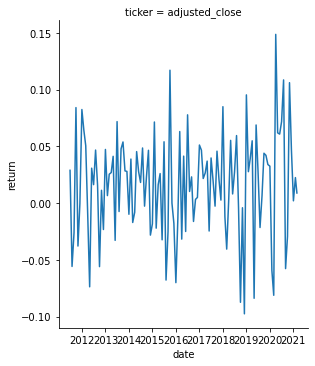

In [328]:
monthly_returns_by_ticker_df = monthly_returns_df.reset_index().melt(
  id_vars = 'date',
  var_name = 'ticker', 
  value_name='return'
)

display(monthly_returns_by_ticker_df.head())

g = sns.relplot(
  data = monthly_returns_by_ticker_df,
  x = 'date',
  y = 'return', 
  col = 'ticker',
  col_wrap = 5,
  kind = "line", 
  height=5, 
  aspect=.75, 
  facet_kws=dict(
    sharex = False,
    sharey = True
  ),
)

# [plt.axvline('2020-02-01', ls='--', color = 'darkred') for _ in g.axes]

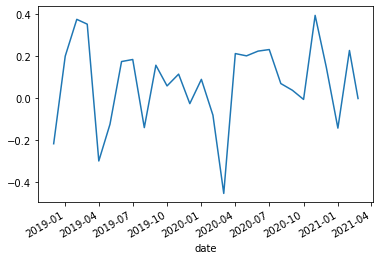

In [345]:
monthly_returns_df.plot();

In [332]:
monthly_avg_returns_df = (
  monthly_returns_df
    .apply(lambda row: row.replace([-np.inf, np.inf], np.nan))
    .dropna(how = 'all')
    .mean(axis = 1)
    .ffill()
)
monthly_avg_returns_df.sample(10)

AttributeError: 'float' object has no attribute 'replace'

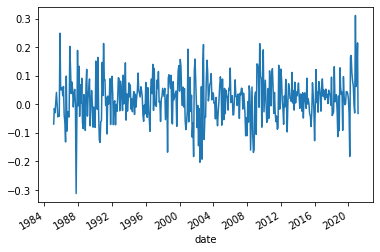

In [307]:
monthly_avg_returns_df.plot();

In [8]:
monthly_spy_returns_df

date
1993-02-01         NaN
1993-03-01    0.017593
1993-03-19    0.017593
1993-04-01    0.017593
1993-05-01    0.026970
                ...   
2020-12-01    0.032647
2020-12-18    0.032647
2021-01-01    0.032647
2021-02-01    0.027805
2021-02-26    0.000000
Name: adjusted_close, Length: 451, dtype: float64

In [9]:
returns_df = monthly_spy_returns_df['2005':'2021']
# returns_df = monthly_avg_returns_df['2000':'2021']
# returns_df = monthly_avg_returns_df
annualized_vol = returns_df.std() * np.sqrt(12)
/
# Calculate total return over all months
return_per_month = (returns_df + 1).prod()

# Calculate return per month
n_months = len(returns_df)
return_per_month = return_per_month**(1 / n_months) - 1

annualized_return = (returns_df + 1).prod()**(12 / n_months) - 1
annualized_return

0.012646753530782817

In [337]:
annualized_vol

0.15828459551338891

In [347]:
annualized_vol

0.7026811159203398

In [338]:
an.annualized_return()

0.06693727477163924

In [339]:
annualized_vol

0.1528572111057931

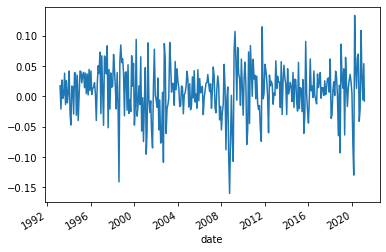

In [310]:
monthly_spy_returns_df.plot();

In [311]:
# This should really be based on a series rather than a constant
riskfree_rate = .03

excess_return = (annualized_return - riskfree_rate)
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

0.23746128961211665

In [315]:
# Calculate the value of a portfolio as it grows over time
portfolio_value = 1000
wealth_index = portfolio_value * (1 + returns_df).cumprod()
wealth_index.head()

date
2000-01-01    1046.132098
2000-02-01    1210.500349
2000-03-01    1372.356028
2000-04-01    1421.650304
2000-05-01    1415.206032
dtype: float64

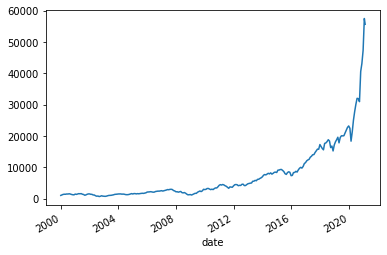

In [318]:
wealth_index.plot.line();

In [319]:
previous_peaks = wealth_index.cummax()
previous_peaks.head()

date
2000-01-01    1046.132098
2000-02-01    1210.500349
2000-03-01    1372.356028
2000-04-01    1421.650304
2000-05-01    1421.650304
dtype: float64

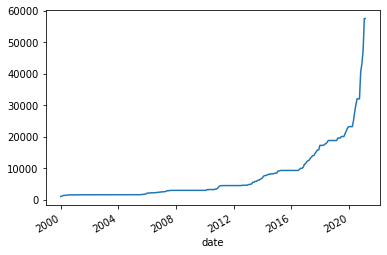

In [320]:
previous_peaks.plot();

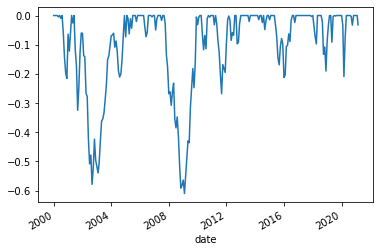

In [321]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot();